# 08/07

## Test of Proportions

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro,levene,bartlett,ttest_1samp,wilcoxon,ttest_ind,mannwhitneyu
import math

### Two sample tests

In [2]:
hr = pd.read_csv('HR.txt',sep='\t',index_col=0)

In [3]:
hr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, Ind1 to Ind1470
Data columns (total 34 columns):
Attrition                   1470 non-null object
Age                         1470 non-null int64
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome              

In [5]:
hr.shape

(1470, 34)

In [6]:
hr.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
hr['Gender'].value_counts()

1    882
2    588
Name: Gender, dtype: int64

In [9]:
ct = pd.crosstab(hr['Attrition'],hr['Gender'])
ct

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


Gender 1 is Male, 2 is female  

Compare Attriton rate of Males and Females using a 2 sample proportion test  
H0 : P(f,yes) = P(m,yes)  
Ha : P(f,yes) != P(m,yes)

In [10]:
def twoSampleProportionTest(x1,x2,n1,n2):
    p1 = x1/n1
    p2 = x2/n2
    pp = (x1+x2)/(n1+n2)
    zstat = (p1-p2)/math.sqrt(pp*(1-pp)*((1/n1)+(1/n2)))
    pval = 2*(1-stats.norm.cdf(abs(zstat)))
    return round(zstat,4), round(pval,4)

In [11]:
twoSampleProportionTest(ct.loc['Yes',1], ct.loc['Yes',2], ct[1].sum(), ct[2].sum())

(1.1293, 0.2588)

- 0.258 > 0.05 implies that attrition rate of males and females are equal

In [12]:
migraine = pd.read_csv('Migraine.csv', index_col=0)

In [13]:
migraine.head()

,id,time,dos,hatype,age,airq,medication,headache,Gender
1,1,-11,753,Aura,30,9.0,continuing,yes,female
2,1,-10,754,Aura,30,7.0,continuing,yes,female
3,1,-9,755,Aura,30,10.0,continuing,yes,female
4,1,-8,756,Aura,30,13.0,continuing,yes,female
5,1,-7,757,Aura,30,18.0,continuing,yes,female


In [14]:
ct = pd.crosstab(migraine['headache'],migraine['Gender'])
ct

Gender,female,male
headache,,
no,1266,220
yes,2279,387


Compare proportion of males and females with headache  
H0 : P(headache, female) = P(headache, male)  
Ha : P(headache, female) != P(headache, male)

In [15]:
twoSampleProportionTest(ct.loc['yes','female'], ct.loc['yes','male'], ct['female'].sum(), ct['male'].sum())

(0.2524, 0.8007)

- 0.8 > 0.05 implies that porportion of headaches for Males and Females are the same

In [16]:
twoSampleProportionTest(ct.iloc[1,0], ct.iloc[1,1], ct.iloc[:,0].sum(), ct.iloc[:,1].sum())

(0.2524, 0.8007)

In [17]:
twoSampleProportionTest(ct.iloc[1,1], ct.iloc[1,0], ct.iloc[:,1].sum(), ct.iloc[:,0].sum())

(-0.2524, 0.8007)

In [18]:
from statsmodels.stats.proportion import proportions_ztest

In [19]:
ct = pd.crosstab(hr['Attrition'],hr['Gender'])
ct

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


In [20]:
x = ct.iloc[1] # (x1,x2)
n = ct.sum(axis=0) # (n1,n2)
proportions_ztest(x,n)

(1.1292547809155016, 0.2587903704911598)

In [21]:
ct = pd.crosstab(migraine['headache'],migraine['Gender'])
ct

Gender,female,male
headache,,
no,1266,220
yes,2279,387


In [22]:
x = ct.iloc[1]
n = ct.sum(axis=0)
proportions_ztest(x,n)

(0.2524275906432048, 0.8007105762350393)

### Chi Square Test

- use if atleast one of the two attributes has more than two categories
- if all groups have exactly same proportion then chi square value will be zero
- if any of the two groups are significantly different then chi square value will be high
- larger the chi square value, more the difference in proportions

In [23]:
obs = np.array([410,340,250,95,85,70])
ex = np.array([404,340,256,101,85,64])

In [24]:
chi_val = (((obs-ex)**2)/ex).sum()
chi_val

1.1486695544554455

- *p_val* 0.563 > 0.05 implies that the proportion of genders for all categories are the same

In [25]:
from scipy.stats import chisquare, chi2_contingency

In [26]:
ct = DataFrame(np.array([[410,340,250],[95,85,70]]))
ct.columns=['Healthy','Mild','Severe']
ct.index=['Male','Female']
ct

,Healthy,Mild,Severe
Male,410,340,250
Female,95,85,70


In [27]:
ch_val,p_val,nrow,EC = chi2_contingency(ct)

In [28]:
ch_val # chi square value

1.1486695544554455

In [29]:
p_val # p value

0.5630793174318253

In [30]:
nrow # degrees of freedom

2

In [31]:
EC # expected count

array([[404., 340., 256.],
       [101.,  85.,  64.]])

In [32]:
DataFrame(EC)

,0,1,2
0,404.0,340.0,256.0
1,101.0,85.0,64.0


In [33]:
ct = pd.crosstab(hr['Attrition'],hr['Gender'])
ct

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


In [34]:
chi2_contingency(ct)

(1.1169671241970978, 0.29057244902890855, 1, array([[739.8, 493.2],
        [142.2,  94.8]]))

In [35]:
twoSampleProportionTest(ct.iloc[1,0], ct.iloc[1,1], ct.iloc[:,0].sum(), ct.iloc[:,1].sum())

(1.1293, 0.2588)

In [36]:
migraine.head()

,id,time,dos,hatype,age,airq,medication,headache,Gender
1,1,-11,753,Aura,30,9.0,continuing,yes,female
2,1,-10,754,Aura,30,7.0,continuing,yes,female
3,1,-9,755,Aura,30,10.0,continuing,yes,female
4,1,-8,756,Aura,30,13.0,continuing,yes,female
5,1,-7,757,Aura,30,18.0,continuing,yes,female


In [37]:
ct = pd.crosstab(migraine['Gender'],migraine['hatype'])
ct

hatype,Aura,Mixed,No Aura
Gender,,,
female,1593,291,1661
male,117,166,324


In [38]:
chi2_contingency(ct)

(259.94962922327386,
 3.569893234435195e-57,
 2,
 array([[1460.00722543,  390.18906551, 1694.80370906],
        [ 249.99277457,   66.81093449,  290.19629094]]))

In [39]:
chi2_contingency(pd.crosstab(migraine['hatype'],migraine['Gender']))

(259.94962922327386,
 3.569893234435195e-57,
 2,
 array([[1460.00722543,  249.99277457],
        [ 390.18906551,   66.81093449],
        [1694.80370906,  290.19629094]]))

- 3.56e-57 < 0.05 implies Gender does influence type of headache
- females are more affected by aura type of headache
- males are more affected by mixed and non-aura types of headache

In [40]:
ct = pd.crosstab(hr['Attrition'],hr['Education'])
ct

Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


In [41]:
chi2_contingency(ct)

(3.0739613982367193,
 0.5455253376565949,
 4,
 array([[142.59183673, 236.53469388, 479.77959184, 333.83265306,
          40.26122449],
        [ 27.40816327,  45.46530612,  92.22040816,  64.16734694,
           7.73877551]]))

- 0.54 > 0.05 implies the attrition rate is same for all education levels
- education levels does not affect attrition rate

In [42]:
# check avg salary of male and females are equal or different. If different which gender gets more
hr_gender = hr.groupby('Gender')
hr_male = hr_gender.get_group(1)
hr_female = hr_gender.get_group(2)
male_sal = hr_male['MonthlyIncome']
female_sal = hr_female['MonthlyIncome']

In [43]:
male_sal.describe()

count      882.000000
mean      6380.507937
std       4714.856577
min       1009.000000
25%       2819.500000
50%       4837.500000
75%       8113.750000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [44]:
female_sal.describe()

count      588.000000
mean      6686.566327
std       4695.608507
min       1129.000000
25%       3037.000000
50%       5081.500000
75%       8711.750000
max      19973.000000
Name: MonthlyIncome, dtype: float64

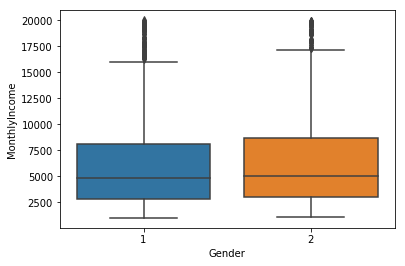

In [45]:
sns.boxplot(x='Gender',y='MonthlyIncome',data=hr)
plt.show()

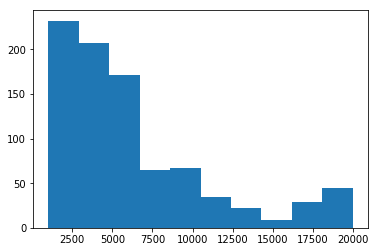

In [46]:
plt.hist(male_sal)
plt.show()

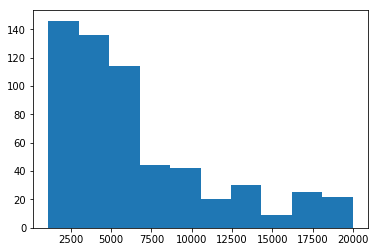

In [47]:
plt.hist(female_sal)
plt.show()

In [48]:
# Check for normality
shapiro(male_sal)

(0.8169718384742737, 1.709933327621381e-30)

In [49]:
shapiro(female_sal)

(0.8416616916656494, 9.378564564919968e-24)

- both samples fail the shapiro test
- neither follows normal distribution

In [50]:
# Compare variances
bartlett(male_sal,female_sal)

BartlettResult(statistic=0.01177553932613755, pvalue=0.9135870578638189)

- the variances of male and female salaries are equal

In [51]:
# Compare means
mannwhitneyu(male_sal,female_sal)

MannwhitneyuResult(statistic=245722.5, pvalue=0.044208341633010594)

- 0.044 < 0.05 implies that there is a significant difference between average salaries of male and female employees
- female salaries are significantly higher than male salaries

In [52]:
# check whether age is a factor influencing headache
migraine = pd.read_csv('Migraine.csv', index_col=0)
migraine_ha = migraine.groupby('headache')
migraine_yes = migraine_ha.get_group('yes')
migraine_no = migraine_ha.get_group('no')
migraine_yes_age = migraine_yes['age']
migraine_no_age = migraine_no['age']

In [53]:
migraine_yes_age.describe()

count    2666.000000
mean       41.870968
std        11.565713
min        18.000000
25%        33.000000
50%        43.000000
75%        50.000000
max        66.000000
Name: age, dtype: float64

In [54]:
migraine_no_age.describe()

count    1486.000000
mean       43.248318
std        10.461453
min        18.000000
25%        35.000000
50%        45.000000
75%        51.000000
max        66.000000
Name: age, dtype: float64

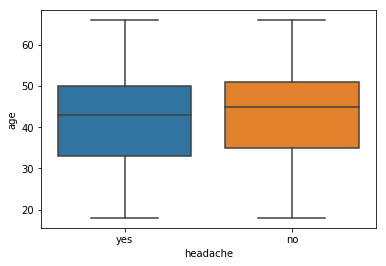

In [55]:
sns.boxplot(x='headache',y='age',data=migraine)
plt.show()

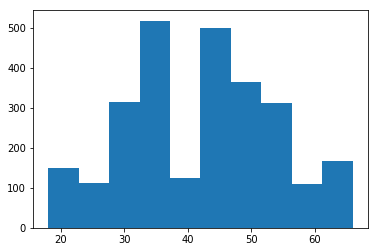

In [56]:
plt.hist(migraine_yes_age)
plt.show()

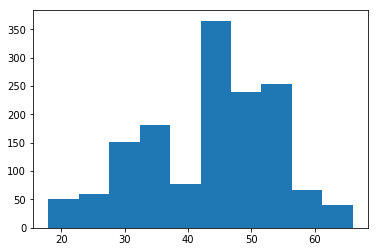

In [57]:
plt.hist(migraine_no_age)
plt.show()

In [58]:
# Check for normality
shapiro(migraine_yes_age)

(0.9792776107788086, 2.8101786270748695e-19)

In [59]:
shapiro(migraine_no_age)

(0.9695512652397156, 3.654197080022843e-17)

- both samples fail shapiro test
- neither follow normal distribution

In [60]:
# compare variances
bartlett(migraine_yes_age, migraine_no_age)

BartlettResult(statistic=18.81174320090529, pvalue=1.4427606409205942e-05)

- the variances of the two samples are different

In [61]:
# compare mean age for two samples
mannwhitneyu(migraine_yes_age, migraine_no_age)

MannwhitneyuResult(statistic=1838755.0, pvalue=6.146547744582879e-05)

- The mean age for people with headaches and not headache are significantly different
- People having headache are younger than those not having headache

In [62]:
fpd = pd.read_csv('fair_pay_data.csv',index_col=0)
fpd.head()

,department,salary,new_hire,job_level
employee_id,,,,
1,Sales,103263.63550,No,Salaried
2,Engineering,80708.64104,No,Hourly
4,Engineering,60737.04786,Yes,Hourly
5,Engineering,99116.32328,Yes,Salaried
7,Engineering,51021.64386,No,Hourly


In [63]:
# check whether there is a significant difference in avg salary between new hires and existing employees
# 2-sample independent t-test
fpd_nh = fpd.groupby('new_hire')
fpd_new = fpd_nh.get_group('Yes')
fpd_old = fpd_nh.get_group('No')
fpd_new_sal = fpd_new['salary']
fpd_old_sal = fpd_old['salary']

In [64]:
fpd_new_sal.describe()

count       398.000000
mean      76074.275577
std       19470.443899
min       43819.555900
25%       61865.222933
50%       71887.543115
75%       86102.882420
max      164072.581000
Name: salary, dtype: float64

In [65]:
fpd_old.describe()

,salary
count,1072.000000
mean,73424.603495
std,18683.501730
min,45714.066160
25%,58879.547668
50%,69963.958250
75%,84195.890952
max,150592.537400


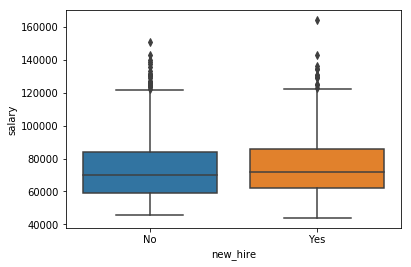

In [66]:
sns.boxplot(x='new_hire',y='salary',data=fpd)
plt.show()

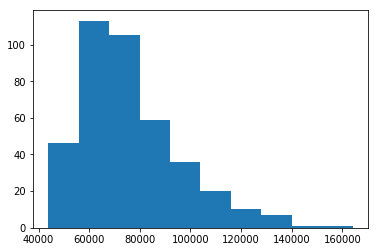

In [67]:
plt.hist(fpd_new_sal)
plt.show()

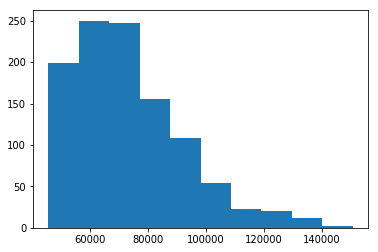

In [68]:
plt.hist(fpd_old_sal)
plt.show()

In [69]:
# check for normality
shapiro(fpd_new_sal)

(0.9288286566734314, 7.915435884867095e-13)

In [70]:
shapiro(fpd_old_sal)

(0.9307342171669006, 7.337439384579142e-22)

- both samples fail shapiro; neither are normal data

In [71]:
bartlett(fpd_new_sal, fpd_old_sal)

BartlettResult(statistic=0.9974141252118108, pvalue=0.31793702390517026)

- variance of new hire salaries and existing salaries are equal

In [72]:
mannwhitneyu(fpd_new_sal,fpd_old_sal)

MannwhitneyuResult(statistic=195511.0, pvalue=0.006877742118645968)

- there is a significance difference in the avg salary for new hires and existing employees
- new hires are getting higher salaries than existing employees

In [73]:
# among the 3 departments, check is there a significantly more hiring is done
# chi-square test
ct = pd.crosstab(fpd['department'],fpd['new_hire'])
ct

new_hire,No,Yes
department,,
Engineering,701,260
Finance,46,17
Sales,325,121


In [74]:
chi2_contingency(ct)

(0.0011396558895788336,
 0.9994303343763208,
 2,
 array([[700.81088435, 260.18911565],
        [ 45.94285714,  17.05714286],
        [325.2462585 , 120.7537415 ]]))

- the proportion of new hires in all the deaprtments are equal

## ANOVA F-Test (Analysis of Variance)

- compare means of more than 2 groups
- null hypothesis is all three groups have equal mean
- alternate hypothesis is any two groups have different means

In [131]:
a = np.array([30,40,50,60])
b = np.array([25,30,50,55])
c = np.array([25,30,40,45])

In [132]:
na = len(a)
nb = len(b)
nc = len(c)
ma = a.mean()
mb = b.mean()
mc = c.mean()
mglobal = (na*ma + nb*mb + nc*mc)/(na+nb+nc)

In [133]:
# sum square treatment
sstr = (na*(ma-mglobal)**2)+(nb*(mb-mglobal)**2)+(nc*(mc-mglobal)**2)
sstr

200.0

In [134]:
# mean square treatment
mstr = sstr/(3-1)
mstr

100.0

In [135]:
va = a.var(ddof=1)
vb = b.var(ddof=1)
vc = c.var(ddof=1)

In [136]:
# sum square error
sse = (na-1)*va + (nb-1)*vb + (nc-1)*vc
sse

1400.0

In [137]:
# mean square error
mse = sse/(na+nb+nc-3)
mse

155.55555555555554

In [138]:
# F-statistic
f_val = mstr/mse
f_val

0.6428571428571429

In [139]:
from scipy.stats import f_oneway

In [140]:
f_oneway(a,b,c)

F_onewayResult(statistic=0.6428571428571429, pvalue=0.5483227164089495)

In [141]:
d = np.array([43,45,45,47])
e = np.array([37,40,40,43])
f = np.array([34,35,35,36])

In [142]:
f_oneway(d,e,f)

F_onewayResult(statistic=32.14285714285714, pvalue=7.970844367886858e-05)

In [143]:
print(a.mean(),b.mean(),c.mean())
print(d.mean(),e.mean(),f.mean())

45.0 40.0 35.0
45.0 40.0 35.0


In [144]:
print(a.var(ddof=1),b.var(ddof=1),c.var(ddof=1))
print(d.var(ddof=1),e.var(ddof=1),f.var(ddof=1))

166.66666666666666 216.66666666666666 83.33333333333333
2.6666666666666665 6.0 0.6666666666666666


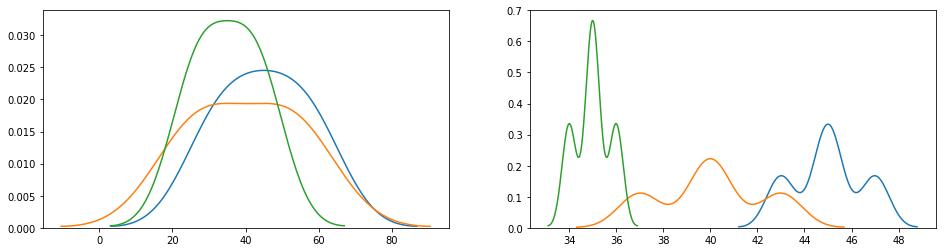

In [147]:
fig,ax = plt.subplots(1,2,figsize=(16,4))
sns.kdeplot(a,ax=ax[0])
sns.kdeplot(b,ax=ax[0])
sns.kdeplot(c,ax=ax[0])
sns.kdeplot(d,ax=ax[1])
sns.kdeplot(e,ax=ax[1])
sns.kdeplot(f,ax=ax[1])
plt.show()

In [146]:
fpd.head()

,department,salary,new_hire,job_level
employee_id,,,,
1,Sales,103263.63550,No,Salaried
2,Engineering,80708.64104,No,Hourly
4,Engineering,60737.04786,Yes,Hourly
5,Engineering,99116.32328,Yes,Salaried
7,Engineering,51021.64386,No,Hourly


In [91]:
# check whether there is a significant difference in avg salary w.r.t job type
fpd['job_level'].value_counts()

Hourly      1039
Salaried     326
Manager      105
Name: job_level, dtype: int64

In [92]:
fpd_jl = fpd.groupby('job_level')
fpd_h = fpd_jl.get_group('Hourly')
fpd_s = fpd_jl.get_group('Salaried')
fpd_m = fpd_jl.get_group('Manager')

In [93]:
f_oneway(fpd_h['salary'], fpd_s['salary'], fpd_m['salary'])

F_onewayResult(statistic=2564.3512004718987, pvalue=0.0)

- avg salary significantly differs with each job type

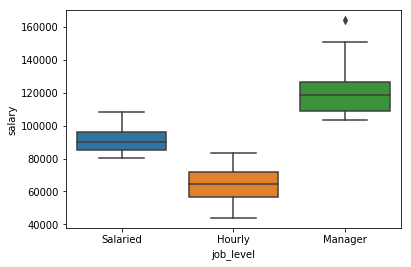

In [94]:
sns.boxplot(x='job_level',y='salary',data=fpd)
plt.show()

In [95]:
# check whether there is a significant difference in avg salary w.r.t job type
fpd_dept = fpd.groupby('department')
fpd_eng = fpd_dept.get_group('Engineering')
fpd_sal = fpd_dept.get_group('Sales')
fpd_fin = fpd_dept.get_group('Finance')

In [96]:
f_oneway(fpd_eng['salary'],fpd_sal['salary'],fpd_fin['salary'])

F_onewayResult(statistic=1.5095348803367656, pvalue=0.22135584696393226)

- avg salary is same across all three departments

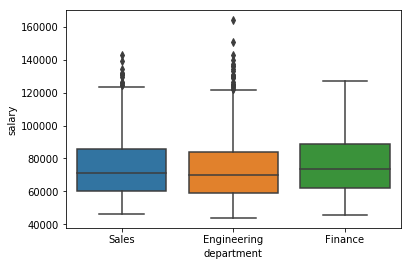

In [97]:
sns.boxplot(x='department',y='salary',data=fpd)
plt.show()

In [98]:
# migraine data - check whether age influences type of headache
m_ha = migraine.groupby('hatype')
m_aura = m_ha.get_group('Aura')
m_mix = m_ha.get_group('Mixed')
m_na = m_ha.get_group('No Aura')

In [99]:
f_oneway(m_aura['age'],m_mix['age'],m_na['age'])

F_onewayResult(statistic=53.863659978037205, pvalue=8.050903622534975e-24)

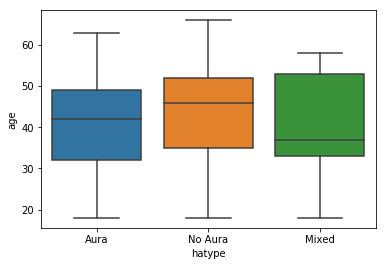

In [100]:
sns.boxplot(x='hatype',y='age',data=migraine)
plt.show()

- age does influence the type of headache
- low age group is sensitive to aura and mixed headaches
- high age group is sensitive to non aura headaches

In [101]:
# check whether air quality influences the type of head ache
f_oneway(m_aura['airq'],m_mix['airq'],m_na['airq'])

F_onewayResult(statistic=30.90848974976332, pvalue=4.738384871920145e-14)

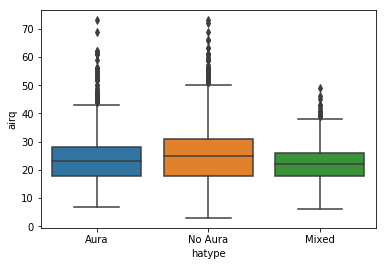

In [102]:
sns.boxplot(x='hatype',y='airq',data=migraine)
plt.show()

- air quality does influence type of headache

In [103]:
migraine.head()

,id,time,dos,hatype,age,airq,medication,headache,Gender
1,1,-11,753,Aura,30,9.0,continuing,yes,female
2,1,-10,754,Aura,30,7.0,continuing,yes,female
3,1,-9,755,Aura,30,10.0,continuing,yes,female
4,1,-8,756,Aura,30,13.0,continuing,yes,female
5,1,-7,757,Aura,30,18.0,continuing,yes,female


In [104]:
migraine_yes['airq'].mean()

24.92798199549902

In [105]:
migraine_no['airq'].mean()

24.643068640646074

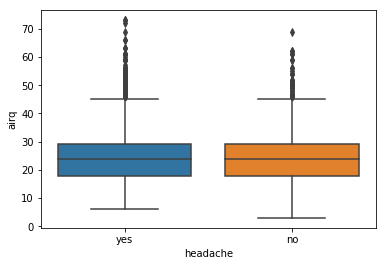

In [106]:
sns.boxplot(x='headache',y='airq',data=migraine)
plt.show()

In [107]:
shapiro(migraine_yes['airq'])

(0.9322961568832397, 3.573005078110578e-33)

In [108]:
shapiro(migraine_no['airq'])

(0.9505487680435181, 5.783748423011813e-22)

In [109]:
bartlett(migraine_yes['airq'],migraine_no['airq'])

BartlettResult(statistic=11.196043052876586, pvalue=0.0008197194648558171)

In [110]:
mannwhitneyu(migraine_yes['airq'],migraine_no['airq'])

MannwhitneyuResult(statistic=1978074.0, pvalue=0.47022797952992873)

In [111]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,gender,chest_pain,blood_pressure,cholestoral,blood_sugar,ecg,heart_rate,exercise,oldpeak,slope,vessels,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [112]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age               270 non-null int64
gender            270 non-null int64
chest_pain        270 non-null int64
blood_pressure    270 non-null int64
cholestoral       270 non-null int64
blood_sugar       270 non-null int64
ecg               270 non-null int64
heart_rate        270 non-null int64
exercise          270 non-null int64
oldpeak           270 non-null float64
slope             270 non-null int64
vessels           270 non-null int64
 thal             270 non-null int64
disease           270 non-null int64
dtypes: float64(1), int64(13)
memory usage: 29.6 KB


In [113]:
# heart disease influenced by age
heart['disease'].value_counts()

1    150
2    120
Name: disease, dtype: int64

- two sample independent t test

In [114]:
hdis = heart.groupby('disease')
hdis1 = hdis.get_group(1)
hdis2 = hdis.get_group(2)

In [115]:
# check for normality
print(shapiro(hdis1['age']))
print(shapiro(hdis2['age']))

(0.9850931167602539, 0.10592219233512878)
(0.9700407385826111, 0.008842713199555874)


- the second sample does not pass shapiro

In [116]:
bartlett(hdis1['age'],hdis2['age'])

BartlettResult(statistic=3.2577509900928834, pvalue=0.07108656067711244)

- the variances of the two samples are equal

In [117]:
mannwhitneyu(hdis1['age'],hdis2['age'])

MannwhitneyuResult(statistic=6634.0, pvalue=0.00010259919242159966)

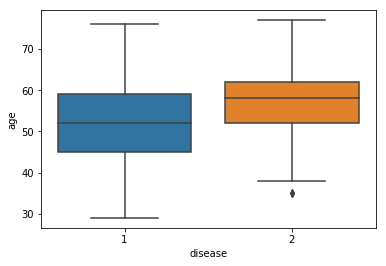

In [118]:
sns.boxplot(x='disease',y='age',data=heart)
plt.show()

- the average age between the two disease types is significant
- older people have disease 2, younger people have disease 1

In [119]:
# gender influencing heart disease
ct = pd.crosstab(heart['disease'],heart['gender'])
ct

gender,0,1
disease,,
1,67,83
2,20,100


In [120]:
x = ct.iloc[1] # (x1,x2)
n = ct.sum(axis=0) # (n1,n2)
proportions_ztest(x,n)

(-4.892051212427, 9.979046910176197e-07)

- gender does influence heart disease

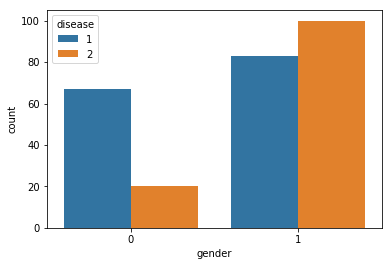

In [121]:
sns.countplot(x='gender',hue='disease',data=heart)
plt.show()

In [122]:
# effect of exercise on heart disease
ct = pd.crosstab(heart['disease'],heart['exercise '])
ct

exercise,0,1
disease,,
1,127,23
2,54,66


In [123]:
x = ct.iloc[1] # (x1,x2)
n = ct.sum(axis=0) # (n1,n2)
proportions_ztest(x,n)

(-6.889846567396626, 5.585259561774452e-12)

- exercise does influence heart disease

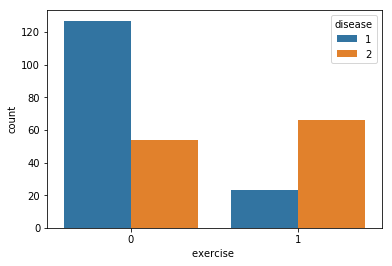

In [124]:
sns.countplot(x='exercise ',hue='disease',data=heart)
plt.show()

In [125]:
# effect of cholesterol on heart disease
# already checked normality, variance for heart disease; need to non-proportional
mannwhitneyu(hdis1['cholestoral'],hdis2['cholestoral'])

MannwhitneyuResult(statistic=7300.5, pvalue=0.003850426503159098)

- cholesterol affects heart disease

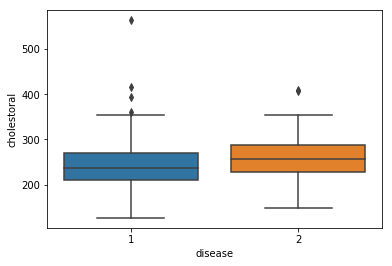

In [126]:
sns.boxplot(x='disease',y='cholestoral',data=heart)
plt.show()

In [127]:
# chest pain having association with age
heart['chest_pain'].value_counts()

4    129
3     79
2     42
1     20
Name: chest_pain, dtype: int64

In [128]:
h_cp = heart.groupby('chest_pain')
hcp1 = h_cp.get_group(1)
hcp2 = h_cp.get_group(2)
hcp3 = h_cp.get_group(3)
hcp4 = h_cp.get_group(4)

In [129]:
f_oneway(hcp1['age'],hcp2['age'],hcp3['age'],hcp4['age'])

F_onewayResult(statistic=2.7003332727789107, pvalue=0.04611452751847922)

- age influences chest pain

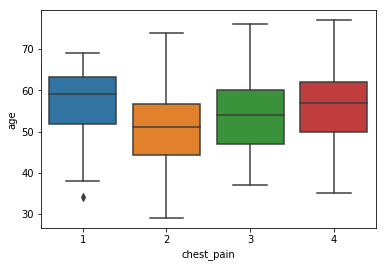

In [130]:
sns.boxplot(x='chest_pain',y='age',data=heart)
plt.show()